## Lab 3: Pandas Overview

[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will learn commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (i.e. selecting rows and columns)
* Filtering data (using boolean arrays)

In this lab you are going to use several pandas methods, such as `drop` and `loc`. You may press `shift+tab` on the method parameters to see the documentation for that method.

**Note**: The Pandas interface is notoriously confusing, and the documentation is not consistently great. Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import zipfile
import os

## Creating DataFrames & Basic Manipulations

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a table in which each column has a type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

The [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for the pandas `DataFrame` class  provide at least two syntaxes to create a data frame.

**Syntax 1: ** You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [2]:
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


**Syntax 2: ** You can also define a dataframe by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [3]:
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

,color,fruit
0,red,apple
1,orange,orange
2,yellow,banana
3,pink,raspberry


You can obtain the dimensions of a dataframe by using the shape attribute `dataframe.shape`.

In [4]:
fruit_info.shape

(4, 2)

You can also convert the entire dataframe into a two-dimensional numpy array.

In [5]:
fruit_info.values

array([['apple', 'red'],
       ['orange', 'orange'],
       ['banana', 'yellow'],
       ['raspberry', 'pink']], dtype=object)

### Question 1(a)

For a DataFrame `d`, you can add a column with `d['new column name'] = ...` and assign a list or array of values to the column. Add a column of integers containing 1, 2, 3, and 4 called `rank1` to the `fruit_info` table which expresses your personal preference about the taste ordering for each fruit (1 is tastiest; 4 is least tasty). 


In [6]:
# YOUR CODE HERE
fruit_info['rank1'] = [1,2,3,4]
#raise NotImplementedError()
fruit_info

,fruit,color,rank1
0,apple,red,1
1,orange,orange,2
2,banana,yellow,3
3,raspberry,pink,4


In [7]:
# TEST 
assert fruit_info["rank1"].dtype == 'int64'


### Question 1(b)

You can also add a column to `d` with `d.loc[:, 'new column name'] = ...`. This way to modify an existing dataframe is faster and therefore preferred over the assignment syntax above. As discussed in lecture, the first parameter is for the rows and second is for columns. The `:` means change all rows and the `new column name` indicates the column you are modifying (or in this case, adding). 

Add a column called `rank2` to the `fruit_info` table which contains the same values in the same order as the `rank1` column.


In [8]:
# YOUR CODE HERE
fruit_info.loc[:,"rank2"] = [1,2,3,4]
#raise NotImplementedError()
fruit_info

,fruit,color,rank1,rank2
0,apple,red,1,1
1,orange,orange,2,2
2,banana,yellow,3,3
3,raspberry,pink,4,4


In [9]:
# TEST 
assert fruit_info["rank2"].dtype == 'int64'


### Question 2

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) both the `rank1` and `rank2` columns you created. (Make sure to use the `axis` parameter correctly.) Note that `drop` does not change a table, but instead returns a new table with fewer columns or rows unless you set the optional `inplace` parameter.

*Hint*: Look through the documentation to see how you can drop multiple columns of a Pandas dataframe at once using a list of column names.

In [14]:
# YOUR CODE HERE
fruit_info_original = fruit_info.drop(['rank1', 'rank2'], axis = 1) 
#raise NotImplementedError()
fruit_info_original

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [13]:
# TEST
assert fruit_info_original.shape == (4,2)

# TEST
assert fruit_info.shape == (4,4)


### Question 3

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) the columns of `fruit_info_original` so they begin with capital letters. Set the `inplace` parameter correctly to change the `fruit_info_original` dataframe. 

In [17]:
# YOUR CODE HERE
fruit_info_original.rename(columns={"fruit": "Fruit", "color": "Color"}, inplace = True)
#raise NotImplementedError()
fruit_info_original

,Fruit,Color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [16]:
# TEST
assert len(fruit_info_original.columns)==2


### Babyname datasets
Now that we have learned the basics, let's move on to the babynames dataset. The babynames dataset contains a record of the given names of babies born in the United States each year.

First let's run the following cells to build the dataframe `baby_names`.

In [18]:
baby_names = pd.read_csv(os.environ['HOME']+"/shared/state_baby_names.csv")
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


## Slicing Data Frames - selecting rows and columns


### Selection Using Label/Index (using loc)

**Column Selection** 

To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage of `.loc` looks like `df.loc[rowname, colname]`. (Reminder that the colon `:` means "everything.")  For example, if we want the `color` column of the `ex` data frame, we would use: `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would select the column `Name` and all columns after `Name`.

- *Alternative:* While `.loc` is invaluable when writing production code, it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `df['colname']`.

**Row Selection**

Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [19]:
#Example:
baby_names.loc[2:5, 'Name']

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [20]:
#Example:  Notice the difference between these two methods
#Just passing in 'Name' returns a Series while ['Name'] returns a Dataframe
baby_names.loc[2:5, ['Name']]

,Name
2,Anna
3,Margaret
4,Helen
5,Elsie


The `.loc` actually uses the Pandas row index rather than row id/position of rows in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 


### Selection using Integer location (using iloc)

In lecture we discussed another pandas feature `iloc[]` which lets you slice the dataframe by row position and column position instead of by row index and column label (which is the case for `loc[]`). This is really the main difference between the 2 functions and it is **important** that you remember the difference and why you might want to use one over the other. In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

As a mnemonic, remember that the i in `iloc` means "integer". 

Below, we have sorted the `baby_names` dataframe. Notice how the *position* of a row is not necessarily equal to the *index* of a row. For example, the first row is not necessarily the row associated with index 1. This distinction is important in understanding the different between `loc[]` and `iloc[]`.

In [21]:
sorted_baby_names = baby_names.sort_values(by=['Name'])
sorted_baby_names.head()

,State,Sex,Year,Name,Count
4116672,NY,M,2013,Aaban,6
4118755,NY,M,2014,Aaban,6
730477,CA,M,2008,Aadan,7
748471,CA,M,2014,Aadan,5
5392325,TX,M,2008,Aadan,5


Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Name` column of the `baby_names` dataframe using both `iloc[]` and `loc[]`. Observe the difference, especially after sorting `baby_names` by name.

In [22]:
sorted_baby_names.iloc[1:4, 3]

4118755    Aaban
730477     Aadan
748471     Aadan
Name: Name, dtype: object

Notice that using `loc[]` with 1:4 gives different results, since it selects using the *index*.

In [23]:
sorted_baby_names.loc[1:4, "Name"]

1          Annie
2141623    Annie
65626      Annie
5940084    Annie
2474948    Annie
           ...  
1524359    Helen
5846263    Helen
264296     Helen
2598349    Helen
4          Helen
Name: Name, Length: 2042507, dtype: object

Lastly, we can change the index of a dataframe using the `set_index` method.

In [24]:
#Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name") 
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


We can now lookup rows by name directly:

In [25]:
df.loc[['Mary', 'Anna'], :]

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [26]:
#Example: 
#df.loc[2:5,"Year"] You can't do this
df.iloc[1:4, 2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


### Question 4

Selecting multiple columns is easy.  You just need to supply a list of column names.  Select the `Name` and `Year` **in that order** from the `baby_names` table.


In [30]:
# YOUR CODE HERE
name_and_year = baby_names.loc[:,['Name', 'Year']]
#raise NotImplementedError()

In [31]:
# TEST
assert name_and_year.shape == (6028151, 2)
assert name_and_year.loc[0,"Name"] == 'Mary'


Note that `.loc[]` can be used to re-order the columns within a dataframe.

## Filtering Data

### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, for culling out fishy outliers, or for analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df['column name'] < 5]]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
>=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in New York

In [32]:
ny = baby_names[baby_names['State'] == 'NY']

### Question 5
Using a boolean array, select the names in Year 2000 (from `baby_names`) that have larger than 3000 counts. Keep all columns from the original `baby_names` dataframe.

Note: Any time you use `p & q` to filter the dataframe, make sure to use `df[(df[p]) & (df[q])]` or `df.loc[(df[p]) & (df[q])]`. That is, make sure to wrap conditions with parentheses.

**Remember** that both slicing and `loc` will achieve the same result, it is just that `loc` is typically faster in production. You are free to use whichever one you would like.

In [35]:
# YOUR CODE HERE
result = baby_names[(baby_names['Year'] == 2000) & (baby_names['Count'] > 3000)]
#raise NotImplementedError()

In [36]:
# TEST
assert len(result)==11
assert result["Count"].iloc[0] == 4341


### Question 6

Some names gain/lose popularity because of cultural phenomena such as a political figure coming to power. Below, we plot the popularity of the female name Hillary in Calfiornia over time. What do you notice about this plot? What might be the cause of the steep drop?

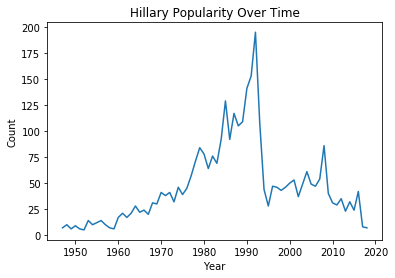

In [38]:
hillary_baby_name = baby_names[(baby_names['Name'] == 'Hillary') & (baby_names['State'] == 'CA') & (baby_names['Sex'] == 'F')]
plt.plot(hillary_baby_name['Year'], hillary_baby_name['Count'])
plt.title("Hillary Popularity Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

First it a line graph showing counts over time. I noticed that there was a steady climb in popularity for the name Hilary from the 1960s to the 1990s then there is a large drop around 1992. This drop is probably related to the election of Bill clinton as president in 1992, making Hilary Clinton the first lady. There was probably not much support for the name Hillary and it peaked just before the name back famous and sunonomis with the first lady and then senator. 